In [12]:
import xarray as xr
import numpy as np
from datetime import datetime, timedelta

from mapper_functions import plot_global_tight_pcm, plot_global_tight

In [13]:
expt_name = 'long_run_cygd_M36'

start_date = datetime(2018, 8, 1)
end_date = datetime(2019, 8, 1)

start_date_str = start_date.strftime('%Y%m%d')
end_date_str = end_date.strftime('%Y%m%d')

In [14]:
# Specify the path to the netCDF file
file_path = f'/discover/nobackup/amfox/Experiments/CYGNSS_development/{expt_name}/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2018/M08/{expt_name}.tavg24_1d_lnd_Nt.20180801_1200z.nc4'

# Open the netCDF file
dataset = xr.open_dataset(file_path)

# Extract the lon and lat variables
lon = dataset['lon']
lat = dataset['lat']

# Print the dimensions of the variables
print(f"Dimensions of lon: {lon.shape}")
print(f"Dimensions of lat: {lat.shape}")

Dimensions of lon: (112573,)
Dimensions of lat: (112573,)


In [15]:
# Open each of the saved files

#data_2015 = np.load(f'{expt_name}_{start_date_str}_{end_date_str}_obsfcstana_extend_datetime_2015.npz', allow_pickle=True)
#data_2016 = np.load(f'{expt_name}_{start_date_str}_{end_date_str}_obsfcstana_extend_datetime_2016.npz', allow_pickle=True)
#data_2017 = np.load(f'{expt_name}_{start_date_str}_{end_date_str}_obsfcstana_extend_datetime_2017.npz', allow_pickle=True)
#data_2018 = np.load(f'{expt_name}_{start_date_str}_{end_date_str}_obsfcstana_extend_datetime_2018.npz', allow_pickle=True)
#data_2019 = np.load(f'{expt_name}_{start_date_str}_{end_date_str}_obsfcstana_extend_datetime_2019.npz', allow_pickle=True)
#data_2020 = np.load(f'{expt_name}_{start_date_str}_{end_date_str}_obsfcstana_extend_datetime_2020.npz', allow_pickle=True)

In [16]:
# Extract and combine the data from each of the files
#date_time = np.concatenate((data_2015['date_time'], data_2016['date_time'], data_2017['date_time'], data_2018['date_time'], data_2019['date_time'], data_2020['date_time']))
#obs_species = np.concatenate((data_2015['obs_species'], data_2016['obs_species'], data_2017['obs_species'], data_2018['obs_species'], data_2019['obs_species'], data_2020['obs_species']))
#obs_tilenum = np.concatenate((data_2015['obs_tilenum'], data_2016['obs_tilenum'], data_2017['obs_tilenum'], data_2018['obs_tilenum'], data_2019['obs_tilenum'], data_2020['obs_tilenum']))
#obs_lon = np.concatenate((data_2015['obs_lon'], data_2016['obs_lon'], data_2017['obs_lon'], data_2018['obs_lon'], data_2019['obs_lon'], data_2020['obs_lon']))
#obs_lat = np.concatenate((data_2015['obs_lat'], data_2016['obs_lat'], data_2017['obs_lat'], data_2018['obs_lat'], data_2019['obs_lat'], data_2020['obs_lat']))
#obs_obs = np.concatenate((data_2015['obs_obs'], data_2016['obs_obs'], data_2017['obs_obs'], data_2018['obs_obs'], data_2019['obs_obs'], data_2020['obs_obs']))
#obs_fcst = np.concatenate((data_2015['obs_fcst'], data_2016['obs_fcst'], data_2017['obs_fcst'], data_2018['obs_fcst'], data_2019['obs_fcst'], data_2020['obs_fcst']))
#obs_ana = np.concatenate((data_2015['obs_ana'], data_2016['obs_ana'], data_2017['obs_ana'], data_2018['obs_ana'], data_2019['obs_ana'], data_2020['obs_ana']))

In [17]:
data_2016 = np.load(f'{expt_name}_{start_date_str}_{end_date_str}_obsfcstana_extend_datetime_2018.npz', allow_pickle=True)

## Extract and combine the data from each of the files
date_time =   ((data_2016['date_time']))
obs_species = ((data_2016['obs_species']))
obs_tilenum = ((data_2016['obs_tilenum']))
obs_lon =     ((data_2016['obs_lon']))
obs_lat =     ((data_2016['obs_lat']))
obs_obs =     ((data_2016['obs_obs']))
obs_fcst =    ((data_2016['obs_fcst']))
obs_ana =     ((data_2016['obs_ana']))


In [18]:
# Calculate obs minus fcst
obs_minus_fcst = []
obs_minus_ana = []
for i in range(len(obs_obs)):
    obs_minus_fcst_chunk = obs_obs[i] - obs_fcst[i]
    obs_minus_fcst.append(obs_minus_fcst_chunk)
    obs_minus_ana_chunk = obs_obs[i] - obs_ana[i]
    obs_minus_ana.append(obs_minus_ana_chunk)
    

In [19]:
# Convert the lists to numpy arrays
obs_minus_fcst = np.array(obs_minus_fcst)
obs_minus_ana = np.array(obs_minus_ana)

In [20]:
# Find unique tilenum values
unique_tilenum = np.unique(obs_tilenum)

# Find the number of unique tilenum values
num_unique_tilenum = len(unique_tilenum)

# Print the number of unique tilenum values
print(f"Number of unique tilenum values: {num_unique_tilenum}")

Number of unique tilenum values: 30127


In [21]:
# Sort the arrays based on obs_tilenum
sort_indices = np.argsort(obs_tilenum)
sorted_obs_tilenum = obs_tilenum[sort_indices]
sorted_obs_species = obs_species[sort_indices]
sorted_obs_obs = obs_obs[sort_indices]
sorted_obs_fcst = obs_fcst[sort_indices]
sorted_obs_ana = obs_ana[sort_indices]
sorted_obs_minus_fcst = obs_minus_fcst[sort_indices]
sorted_obs_minus_ana = obs_minus_ana[sort_indices]
sorted_date_time = date_time[sort_indices]

# Find the unique tilenum values and their counts
unique_tilenum, counts = np.unique(sorted_obs_tilenum, return_counts=True)

# Calculate the indices where the groups should be split
split_indices = np.cumsum(counts)[:-1]

# Split the sorted arrays based on the split indices
obs_species_grouped = np.split(sorted_obs_species, split_indices)
obs_obs_grouped = np.split(sorted_obs_obs, split_indices)
obs_fcst_grouped = np.split(sorted_obs_fcst, split_indices)
obs_ana_grouped = np.split(sorted_obs_ana, split_indices)
obs_minus_fcst_grouped = np.split(sorted_obs_minus_fcst, split_indices)
obs_minus_ana_grouped = np.split(sorted_obs_minus_ana, split_indices)
date_time_grouped = np.split(sorted_date_time, split_indices)

In [22]:
# Print the length of obs_obs_grouped
print(f"Length of obs_obs_grouped: {len(obs_obs_grouped)}")

Length of obs_obs_grouped: 30127


In [23]:
# Run this cell if you have a single sensor experiment

# Find the number of observations for each tilenum
num_obs = []
for i in range(num_unique_tilenum):
    num_obs.append(len(obs_obs_grouped[i]))

# Calculate the mean obs_obs for each tilenum
mean_obs_obs = []
for i in range(num_unique_tilenum):
    mean_obs_obs.append(np.mean(obs_obs_grouped[i]))

# Calculate the mean obs_fcst for each tilenum
mean_obs_fcst = []
for i in range(num_unique_tilenum):
    mean_obs_fcst.append(np.mean(obs_fcst_grouped[i]))

# Calculate the mean obs_ana for each tilenum
mean_obs_ana = []
for i in range(num_unique_tilenum):
    mean_obs_ana.append(np.mean(obs_ana_grouped[i]))

# Calculate the mean obs_minus_fcst for each tilenum
mean_obs_minus_fcst = []
for i in range(num_unique_tilenum):
    mean_obs_minus_fcst.append(np.mean(obs_minus_fcst_grouped[i]))

# Calculate the mean obs_minus_ana for each tilenum
mean_obs_minus_ana = []
for i in range(num_unique_tilenum):
    mean_obs_minus_ana.append(np.mean(obs_minus_ana_grouped[i]))

# Calculate the standard deviation of obs_minus_fcst for each tilenum
std_obs_minus_fcst = []
for i in range(num_unique_tilenum):
    std_obs_minus_fcst.append(np.std(obs_minus_fcst_grouped[i]))

# Calculate the standard deviation of obs_minus_ana for each tilenum
std_obs_minus_ana = []
for i in range(num_unique_tilenum):
    std_obs_minus_ana.append(np.std(obs_minus_ana_grouped[i]))

In [24]:
# Assign lon and lat to each tilenum
lon_tilenum = []
lat_tilenum = []
for i in range(num_unique_tilenum):
    lon_tilenum.append(lon[int(unique_tilenum[i])])
    lat_tilenum.append(lat[int(unique_tilenum[i])])

# Convert the lists to numpy arrays
lon_tilenum = np.array(lon_tilenum)
lat_tilenum = np.array(lat_tilenum)

In [25]:
# Run this cell if you have a single sensor experiment
# Save all of the calculated values to a file
np.savez(f'{expt_name}_{start_date_str}_{end_date_str}_obsfcstana_stats.npz', 
         unique_tilenum=unique_tilenum, 
         num_obs=num_obs, 
         mean_obs_obs=mean_obs_obs, 
         mean_obs_fcst=mean_obs_fcst, 
         mean_obs_ana=mean_obs_ana, 
         mean_obs_minus_fcst=mean_obs_minus_fcst, 
         mean_obs_minus_ana=mean_obs_minus_ana, 
         std_obs_minus_fcst=std_obs_minus_fcst, 
         std_obs_minus_ana=std_obs_minus_ana, 
         lon_tilenum=lon_tilenum, 
         lat_tilenum=lat_tilenum )

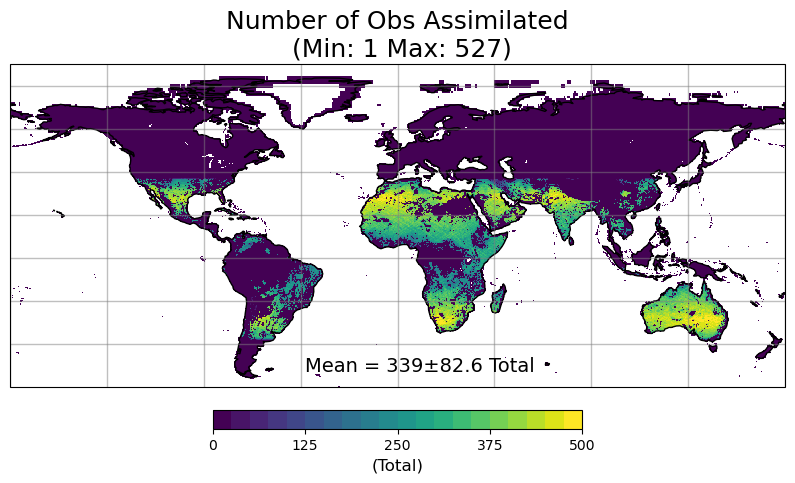

In [30]:

test_array = num_obs
test_array = np.array(test_array)
#test_array[test_array < 1.] = np.nan
    
obarray = np.empty([num_unique_tilenum, 3])
obarray[:, 1] = lon_tilenum
obarray[:, 2] = lat_tilenum
obarray[:, 0] = test_array
   
#plot_global_tight_pcm(obarray,False, True,'Number of Obs Assimilated','Total',0,300)

maxval = np.nanmax(obarray[:, 0])
minval = np.nanmin(obarray[:, 0])

plot_global_tight_pcm(obarray, False, True, f'Number of Obs Assimilated\n (Min: {minval:.3g} Max: {maxval:.3g})', 'Total', 0, 500)